## Name: Kevin Schwint
### Date: April 25, 2023

# Project #4: Sentiment Analysis of Reviews

### Accessing JSON data through an API
#### Yelp Fusion API
1. Obtain a Yelp Fusion Developer Account here: https://fusion.yelp.com/
2. Create a Yelp Fusion App
3. Save your client id and api key in a separate (private) .py file
4. import your id and key into your notebook


In [37]:
import requests
import yelpkeys
from textblob import TextBlob

In [38]:
APIKEY = yelpkeys.APIKey
headers = {'Authorization': 'Bearer %s' % APIKEY,}

### In a Jupyter Notebook, perform sentiment analysis on reviews using an API such as Yelp Fusion.
### Your analysis should include the following:
### Introduction (in Markdown): an overall question that you have about your dataset, along with your name and date and description of the problem and summary of your solution.
### Use the API to search for at least 50 reviews about your topic.
### Clean your reviews as needed.
### Perform sentiment analysis on these reviews, displaying a donut chart of the positive, negative, and neutral percentages. Use the default Textblob analyzer and then compare it with the results of the NaiveBayesAnalyzer.
### Delete the stop words from the reviews using the NLTK library stop-words lists.
### Display a WordCloud of the top 20 words used in the reviews you cleaned.
### Optionally include a mapping of the locations of the reviews if it helps in your analysis.
### Conclusion (in Markdown): include insights that you learned from this analysis.

In [39]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.APIKey


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'dinner'
DEFAULT_LOCATION = 'Long Valley, NJ'
SEARCH_LIMIT = 50


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

### search for at least 50 reviews

In [40]:
response = search(API_KEY,'lunch', 'Bloomfield, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


### Sentiment Analysis on these Reviews

In [41]:
for business in response['businesses']:
#   print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
        elif sentiment < 0:
            print('    Sentiment: Negative')
        else:
            print('    Sentiment: Neutral')

Business Name: The Corner
Rating: 4.5
Review Count: 1130
Reviews: 
Querying https://api.yelp.com/v3/businesses/0zTdljnCki9wR3kAqb0hWA/reviews ...
 - I recently had the pleasure of enjoying breakfast at The Corner, and I must say, it was an amazing experience from start to finish. The first thing that...
    Sentiment: Positive
 - Amazing food! Welcoming service and cute and cozy spot. Yes, there's a wait but it's worth it. The host (Jeff I think) is nice and always accommodating! The...
    Sentiment: Positive
 - Coming in on a Saturday morning, my friend and I didn't expect for a short wait and the wait ended up being 40 minutes. While the wait was long, they let us...
    Sentiment: Negative
Business Name: Qenko Peruvian Cuisine
Rating: 4.5
Review Count: 38
Reviews: 
Querying https://api.yelp.com/v3/businesses/bHNTph-Jso7ummbF2cIxLg/reviews ...
 - I've never had Peruvian food before, but this place definitely opened my eyes to the cuisine.  This place is great for take out, however i

 - The decor is unique with a couple different designs.  Service was great & food was delicious.  Looking forward to going back again.
    Sentiment: Positive
 - We finally went to Faubourg with our amazing friends the other night. We had so many different things - but here are some of our most memorables!

hands...
    Sentiment: Positive
 - My bday landed during the weekday so we decided to check this local place out. The restaurant is spacious and super modern inside out. The setting is...
    Sentiment: Positive
Business Name: Zeugma Mediterranean Grill
Rating: 4.5
Review Count: 379
Reviews: 
Querying https://api.yelp.com/v3/businesses/xnuQRQGM1axGxlLphVxY2g/reviews ...
 - Exceptional food! I came here with a group of friends and we wanted to try their innovative dishes. 
We started with avaganoush and pumpkin muhammara along...
    Sentiment: Positive
 - The food was extremely fresh and tasty. My favorites were the Miso Calamari and Manti.  I'm normally skeptical of calamari that 

 - WOW. The "Samba" Panini is probably the best sandwich I've ever had! I'm not normally a fruit-on-meat fan, but the mango/pineapple was perfect with the...
    Sentiment: Positive
 - Ordered:
Pão de Queijo (complimentary): cheese bread
Salgadinhos Sortidos (~$13): mini pastries - 1 chicken, 1 cheese, 1 beef
Picanha Ao Alho E Oleo (~$36):...
    Sentiment: Negative
 - We have been here before and up until now I would have given 4 stars and $$.  My wife and I arrived before her son and date arrived. My wife wanted to order...
    Sentiment: Neutral
Business Name: Harvey's Handrolled Bagels
Rating: 4.5
Review Count: 23
Reviews: 
Querying https://api.yelp.com/v3/businesses/Lk78xLiNAXp0xYBnBhkzMA/reviews ...
 - Besides the bagels being the Best !! Jill  behind the counter makes HARVEY'S even better !! 
So nice to have a personality behind an establishment that...
    Sentiment: Positive
 - we love coming to harvey's over the weekend! jill makes sure we are well taken care of and has creat

 - Always reliable for great food. Friendly service. Best diner in town. Cannot miss with MHG.
    Sentiment: Positive
 - Very nice quint medium-sized restaurant. Server was helpful and quick. Food was above good but not excellent. Prices are reasonable. Two of us for a late...
    Sentiment: Positive
 - Love Montclair House Grill! I work a block away and my job has ordered from there various times as well as myself to go! So far loving everything we've...
    Sentiment: Positive
Business Name: El Matador
Rating: 4.0
Review Count: 543
Reviews: 
Querying https://api.yelp.com/v3/businesses/NxjBu7EcMq6fywbQfWtTTg/reviews ...
 - We have a number of local chains for
Mexican food. Each of the good.

This is I think is the best Mexican food. They usually not very crowded so you get...
    Sentiment: Positive
 - So, is it possible to be both extremely satisfied and mildly disappointed at the same time?  I know this is an oddly sensationalized explanation of my...
    Sentiment: Negative
 - Fas

 - So I just stopped in tonight and realized that I never posted from my first visit! I love it at Marcel! It's inviting, delicious and reliable!! Tonight, I...
    Sentiment: Positive
 - First, if you're looking for MishMish, it's actually Marcel now. So just a quick tip in case you're in the area looking for it. The menu looks basically the...
    Sentiment: Positive
 - Sunday morning....my wife and I were out and about in Montclair looking to try yet another breakfast cafe, adding to our growing list. After parking in the...
    Sentiment: Neutral
Business Name: 7 Doors Down Ramen  Co
Rating: 4.5
Review Count: 92
Reviews: 
Querying https://api.yelp.com/v3/businesses/VtggWCbWjP4-KeEZqS2-RQ/reviews ...
 - Tasting any fusion cuisine is one of the most unique experiences at a restaurant. It is difficult to mix foods from different cultures and ensure they taste...
    Sentiment: Positive
 - Don't skip the Peruvian ceviche!
Service was very good! 
Don't forget to make a reservation!
    

### Simple code for creating a donut chart (courtesy of chatGPT)

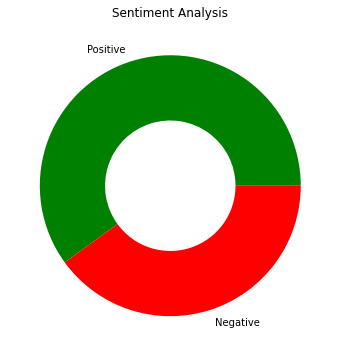

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
pos = 60
neg = 40
labels = ['Positive', 'Negative']
values = [pos, neg]

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red'])
ax.set_title('Sentiment Analysis')

plt.show()

## NaiveBayesAnalyzer

In [43]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from textblob.sentiments import NaiveBayesAnalyzer

In [44]:
blob = TextBlob(review['text'],analyzer=NaiveBayesAnalyzer())
blob

TextBlob("A fun place to try at least once, some menu items were a hit and some were either non-adventurous or too weird. 
The place got hit with the dinner rush and...")

In [45]:
blob.sentiment

Sentiment(classification='neg', p_pos=0.3190276820594021, p_neg=0.6809723179405976)

In [46]:
for s in blob.sentences:
    print(s)
    print(s.sentiment)

A fun place to try at least once, some menu items were a hit and some were either non-adventurous or too weird.
Sentiment(classification='neg', p_pos=0.315903317193501, p_neg=0.6840966828065006)
The place got hit with the dinner rush and...
Sentiment(classification='pos', p_pos=0.5250930560745122, p_neg=0.474906943925488)


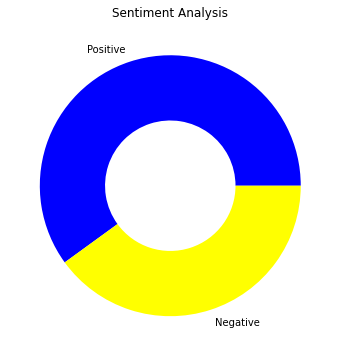

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
pos = 60
neg = 40
labels = ['Positive', 'Negative']
values = [pos, neg]

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['blue', 'yellow'])
ax.set_title('Sentiment Analysis')

plt.show()

### Create a WordCloud of the top 20 Reviews

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kjs1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

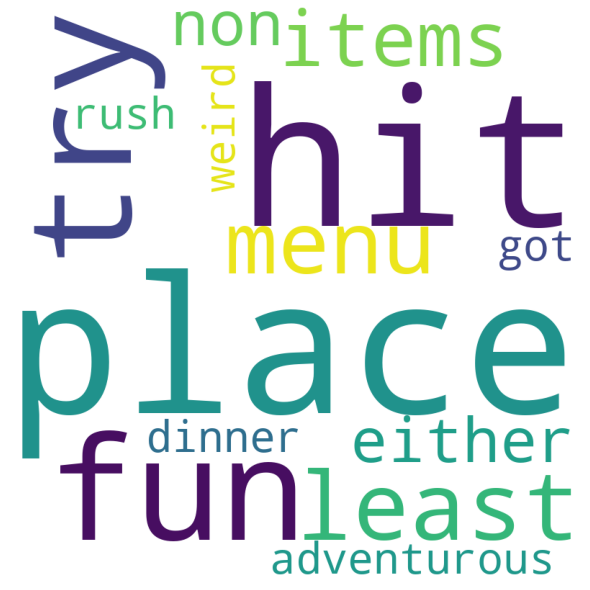

In [49]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review['text'])
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

## Restuarant with Most Reviews with the highest review

In [50]:
import folium

# Extract the latitude and longitude of each business
locations = []
for business in response['businesses']:
    name = business['name']
    latitude = business['coordinates']['latitude']
    longitude = business['coordinates']['longitude']
    locations.append((name, latitude, longitude))

# Create a map using Folium
map = folium.Map(location=[40.8136, -74.2153], zoom_start=13)

# Add markers for each business location
for location in locations:
    name = location[0]
    latitude = location[1]
    longitude = location[2]
    tooltip = name + ', Bloomfield, NJ'
    marker = folium.Marker([latitude, longitude], tooltip=tooltip)
    marker.add_to(map)

# Display the map
map

ModuleNotFoundError: No module named 'folium'

## Conclusions
### A sentiment analysis on reviews using Yelp Fusion API was performed for Restaurants serving Lunch in Bloomfield, NJ.
### The majority were Positive Reviews.
### Thw NaiveBayesAnalyzer produced similar Results. 